In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

# Create basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a series of random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the list of latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | manoel urbano
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | acari
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | raisinghnagar
Processing Record 9 of Set 1 | gat
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | rincon
Processing Record 13 of Set 1 | kudahuvadhoo
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | taolanaro
Processing Record 17 of Set 1 | igrim
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | tanout
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | gao
Processing Record 23 of Set 1 | pra

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | manoel urbano
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | acari
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | raisinghnagar
Processing Record 9 of Set 1 | gat
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | rincon
Processing Record 13 of Set 1 | kudahuvadhoo
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | igrim
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | tanout
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | gao
Process

Processing Record 35 of Set 4 | vestmannaeyjar
Processing Record 36 of Set 4 | aden
Processing Record 37 of Set 4 | bindura
Processing Record 38 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 39 of Set 4 | belyy yar
Processing Record 40 of Set 4 | ilhabela
Processing Record 41 of Set 4 | log
Processing Record 42 of Set 4 | crystal beach
Processing Record 43 of Set 4 | mali
Processing Record 44 of Set 4 | marcona
City not found. Skipping...
Processing Record 45 of Set 4 | camacupa
Processing Record 46 of Set 4 | ipixuna
Processing Record 47 of Set 4 | galle
Processing Record 48 of Set 4 | lodwar
Processing Record 49 of Set 4 | laguna
Processing Record 50 of Set 4 | ayagoz
Processing Record 1 of Set 5 | van
Processing Record 2 of Set 5 | ineu
Processing Record 3 of Set 5 | ayorou
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | ugoofaaru
Processing Record 6 of Set 5 | iskateley
Processing Record 7 of Set 5 | barra
Processing Record 8 of Set 5 

City not found. Skipping...
Processing Record 29 of Set 8 | la libertad
Processing Record 30 of Set 8 | bereda
Processing Record 31 of Set 8 | awbari
Processing Record 32 of Set 8 | nanortalik
Processing Record 33 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 34 of Set 8 | a coruna
Processing Record 35 of Set 8 | funadhoo
Processing Record 36 of Set 8 | porto novo
Processing Record 37 of Set 8 | nouakchott
Processing Record 38 of Set 8 | kamskiye polyany
Processing Record 39 of Set 8 | nicoya
Processing Record 40 of Set 8 | semey
Processing Record 41 of Set 8 | chimoio
Processing Record 42 of Set 8 | camacha
Processing Record 43 of Set 8 | bardiyah
Processing Record 44 of Set 8 | conde
Processing Record 45 of Set 8 | tulsipur
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | canico
Processing Record 48 of Set 8 | karaul
City not found. Skipping...
Processing Record 49 of Set 8 | sabzevar
Processing Record 50 of Set 8 | ous
Processing Record

Processing Record 15 of Set 12 | zaranj
Processing Record 16 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 17 of Set 12 | lira
Processing Record 18 of Set 12 | quelimane
Processing Record 19 of Set 12 | honningsvag
Processing Record 20 of Set 12 | korla
Processing Record 21 of Set 12 | inirida
Processing Record 22 of Set 12 | kadom
Processing Record 23 of Set 12 | le port
Processing Record 24 of Set 12 | varnamo
Processing Record 25 of Set 12 | chimbote
Processing Record 26 of Set 12 | marsa matruh
Processing Record 27 of Set 12 | kyabe
Processing Record 28 of Set 12 | svetlyy
Processing Record 29 of Set 12 | qasigiannguit
Processing Record 30 of Set 12 | apatity
Processing Record 31 of Set 12 | mandera
Processing Record 32 of Set 12 | puerto leguizamo
Processing Record 33 of Set 12 | yei
Processing Record 34 of Set 12 | liverpool
Processing Record 35 of Set 12 | manaus
Processing Record 36 of Set 12 | lamu
Processing Record 37 of Set 12 | ouadda
Processing R

In [7]:
len(city_data)

550

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardo,70.37,31.11,32.00,70,90,11.41,NO,2020-10-18 22:44:04
1,Dikson,73.51,80.55,28.49,93,98,30.04,RU,2020-10-18 22:44:04
2,Manoel Urbano,-8.84,-69.26,72.28,93,90,3.51,BR,2020-10-18 22:44:05
3,Bredasdorp,-34.53,20.04,57.20,87,100,2.24,ZA,2020-10-18 22:44:05
4,Acari,-15.43,-74.62,65.07,66,26,6.33,PE,2020-10-18 22:44:05
5,Codrington,-38.27,141.97,55.54,78,31,5.84,AU,2020-10-18 22:44:05
6,San Cristobal,7.77,-72.22,87.80,45,40,16.11,VE,2020-10-18 22:44:05
7,Raisinghnagar,29.54,73.45,69.85,23,0,0.49,IN,2020-10-18 22:44:06
8,Gat,31.61,34.76,75.20,78,40,4.70,IL,2020-10-18 22:44:06
9,Ushuaia,-54.80,-68.30,39.20,86,40,0.54,AR,2020-10-18 22:41:43


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2020-10-18 22:44:04,70.37,31.11,32.00,70,90,11.41
1,Dikson,RU,2020-10-18 22:44:04,73.51,80.55,28.49,93,98,30.04
2,Manoel Urbano,BR,2020-10-18 22:44:05,-8.84,-69.26,72.28,93,90,3.51
3,Bredasdorp,ZA,2020-10-18 22:44:05,-34.53,20.04,57.20,87,100,2.24
4,Acari,PE,2020-10-18 22:44:05,-15.43,-74.62,65.07,66,26,6.33
...,...,...,...,...,...,...,...,...,...
545,La Palma,US,2020-10-18 22:44:19,33.85,-118.05,84.99,42,1,6.93
546,Gazli,UZ,2020-10-18 22:46:07,40.13,63.45,53.71,36,0,13.06
547,Domoni,KM,2020-10-18 22:46:08,-12.26,44.53,76.33,77,11,5.88
548,Ayolas,PY,2020-10-18 22:46:08,-27.40,-56.90,80.76,50,0,5.01


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import time module
import time
# Get todays date in seconds
today = time.time()
today

1603061234.7936041

In [16]:
today = time.strftime("%x")
today

'10/18/20'

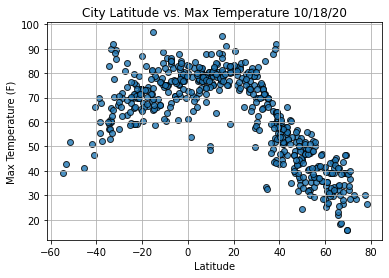

In [17]:
# Build the scatter plot for latitudes vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

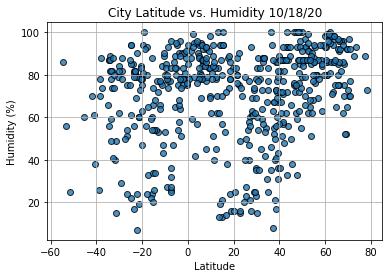

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

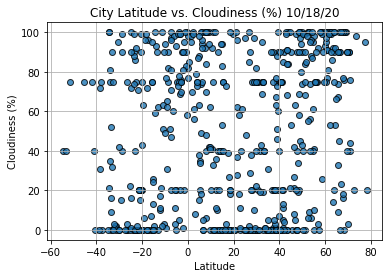

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

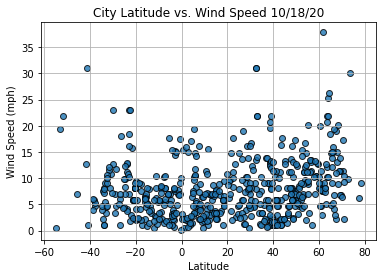

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()